In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19  # Updated import
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/train'
valid_path = '/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/test'


In [3]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  # Updated VGG19 model


Metal device set to: Apple M2
80134624/80134624 [==============================] - 19s 0us/step


In [4]:
for layer in vgg.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob('/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/train/*')


In [5]:

# Add layers to the model
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [6]:
# Get the number of output classes
folders = glob('/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/train/*')


In [7]:
# Add layers to the model
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [8]:
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# View the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# Configure the model for training
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the training and test data generators
training_set = train_datagen.flow_from_directory('/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/Users/aritroochowdhury/Workspace/mini-proj/chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/5y/jv45l7ls18qdd7wn0_sykps40000gn/T/ipykernel_4923/1080985953.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 94s 575ms/step - loss: 0.2087 - accuracy: 0.9239 - val_loss: 0.2533 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 97s 592ms/step - loss: 0.1683 - accuracy: 0.9390 - val_loss: 0.2765 - val_accuracy: 0.8958
Epoch 3/5
163/163 [==============================] - 120s 737ms/step - loss: 0.1174 - accuracy: 0.9551 - val_loss: 0.3091 - val_accuracy: 0.9119
Epoch 4/5
163/163 [==============================] - 123s 753ms/step - loss: 0.0869 - accuracy: 0.9678 - val_loss: 0.5751 - val_accuracy: 0.8574
Epoch 5/5
163/163 [==============================] - 132s 810ms/step - loss: 0.1300 - accuracy: 0.9578 - val_loss: 0.3137 - val_accuracy: 0.9006


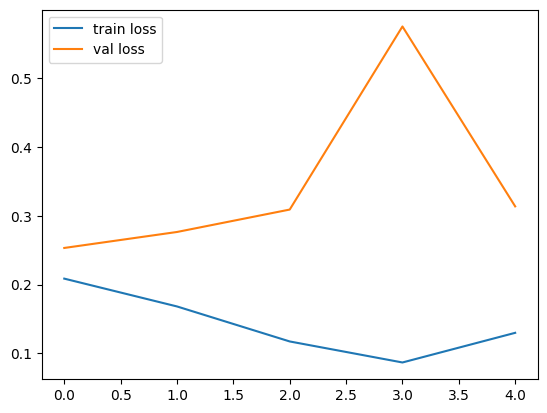

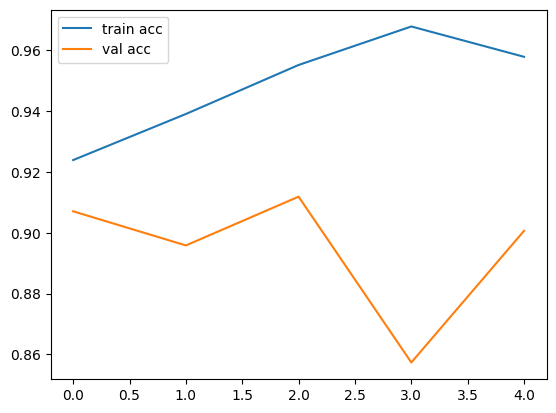

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
import tensorflow as tf
from keras.models import load_model

model.save('model_vgg19.h5')

/opt/homebrew/anaconda3/envs/newenv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
